# Réseau de Neurone

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

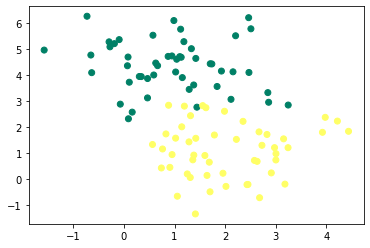

In [17]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')

## Fonction d'Initialisation

In [27]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    
    return (W, b)

In [28]:
initialisation(X)

(array([[-0.59402798],
        [-0.03928505]]),
 array([0.73741343]))

## Création du modèle

In [86]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    
    return A

## Définition de la Fonction Coût

In [87]:
def log_loss(A, y):
    L = 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))
    return L

## Définition des Gradients

In [88]:
def gradients(A, X, y):
    dw = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    
    return (dw, db)

## La Fonction de Mise à Jour

In [89]:
def update(dw, db, W, b, learning_rate):
    W = W - learning_rate * dw
    b = b - learning_rate * db
    
    return (W, b)

In [94]:
def predict(X, W, b):
    A = modele(X, W, b)
    # print(A)
    return A >= 0.5

In [95]:
from sklearn.metrics import accuracy_score

## La Fonction d'entrainement

In [96]:
 def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 100):
    # initialisation W, b
    W, b = initialisation(X)

    Loss = []

    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)

    y_pred = predict(X, W, b)
    print(accuracy_score(y, y_pred))

    plt.plot(Loss)
    plt.show()

    return (W, b)
    

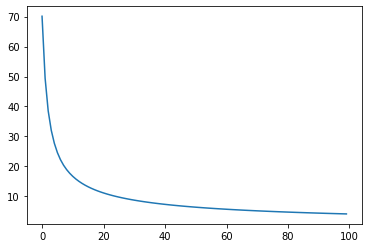

In [102]:
W, b = artificial_neuron(X, y)

In [103]:
y_pred = predict(X, W, b)